In [4]:
from src.l_curve import create_L_curve
import matplotlib.pyplot as plt
import pandas as pd
import os
import firedrake

Reading outline from icepack database


In [2]:
folder_path = "completed/16/"

# Get file names starting with 'ASE'
file_names = [file for file in os.listdir(folder_path) if file.startswith('ASE')]

name = file_names[-1][:40]
variable = 'simultaneous'
l_curve = create_L_curve(folder_path+name, variable,  mesh='pig',  invert_iter = 100, workers = 3)


 function started for simultaneous 0.0001
 function started for simultaneous 0.001


 function started for simultaneous 0.01Reading outline from icepack databaseReading outline from icepack database


Reading outline from icepack database
Reading velocity from specified file
Reading velocity from specified file
Reading velocity from specified file
C0 is constant: 0.001
C0 is constant: 0.001
C0 is constant: 0.001

Truncated CG Trust-Region Solver
  iter  value          gnorm          snorm          delta          #fval     #grad     tr_flag   iterCG    flagCG    
  0     1.624205e+08   3.000142e+03                  5.299500e+04   

Truncated CG Trust-Region Solver
  iter  value          gnorm          snorm          delta          #fval     #grad     tr_flag   iterCG    flagCG    
  0     1.624205e+08   3.000142e+03                  5.515656e+04   

Truncated CG Trust-Region Solver
  iter  value          gnorm          snorm          delta          #fval     #grad     tr_flag   iterCG 

[0]PETSC ERROR: [0]PETSC ERROR: ------------------------------------------------------------------------
------------------------------------------------------------------------
[0]PETSC ERROR: [0]PETSC ERROR: Caught signal number 15 Terminate: Some process (or the batch system) has told this process to end
Caught signal number 15 Terminate: Some process (or the batch system) has told this process to end
[0]PETSC ERROR: [0]PETSC ERROR: Try option -start_in_debugger or -on_error_attach_debugger
Try option -start_in_debugger or -on_error_attach_debugger
[0]PETSC ERROR: [0]PETSC ERROR: or see https://petsc.org/release/faq/#valgrind and https://petsc.org/release/faq/
or see https://petsc.org/release/faq/#valgrind and https://petsc.org/release/faq/
[0]PETSC ERROR: [0]PETSC ERROR: configure using --with-debugging=yes, recompile, link, and run 
configure using --with-debugging=yes, recompile, link, and run 
[0]PETSC ERROR: [0]PETSC ERROR: to get more information on the crash.
to get more info

BrokenProcessPool: A process in the process pool was terminated abruptly while the future was running or pending.

Expected Values:
| Regularization constant | J1                 | J2                   |
|-------------------------|--------------------|----------------------|
| 0.0001                  | 266749.1896340227 | 0.002094095565350594 |
| 0.001                   | 2759.025625870297 | 0.004885945541096665 |
| 0.003                   | 1020.9756034735555| 0.008201846653879385 |
| 0.005                   | 668.7791409238811 | 0.013263748230947737 |
| 0.01                    | 367.79569115713986| 0.02819511212260797  |
| 0.03                    | 120.91222789453269| 0.10821008028536558  |
| 0.05                    | 63.941854869435225| 0.1931869365518476   |
| 0.07                    | 44.24027409808602 | 0.26192420333146105 |
| 0.1                     | 32.238402217772595| 0.34569303829886133 |
| 1                       | 14.19111404096829 | 5.485243691038267   |
| 10                      | 17.05728254729139 | 16.77375112472684   |
| 100                     | 13.139651777387261| 21.299744491766248  |
| 1000                    | 13.103305942717032| 22.46306682989553   |

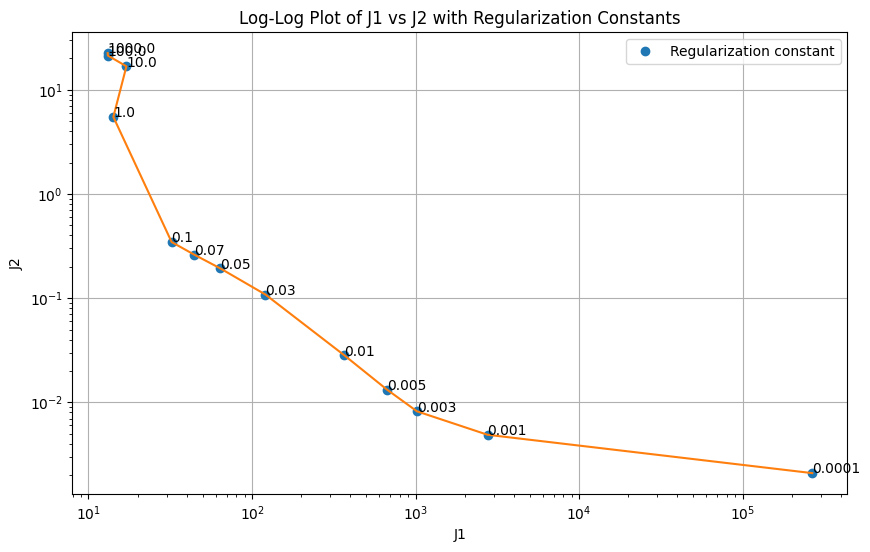

In [9]:
# Plot
plt.figure(figsize=(10, 6))

# Plot scatter points
plt.loglog(l_curve['J1'], l_curve['J2'], marker='o', linestyle='', label='Regularization constant')

# Plot line connecting the points
plt.loglog(l_curve['J1'], l_curve['J2'], marker='', linestyle='-')

# Annotate points with regularization values
for i, txt in enumerate(l_curve['Regularization Constant']):
    plt.annotate(txt, (l_curve['J1'][i], l_curve['J2'][i]))

plt.xlabel('J1')
plt.ylabel('J2')
plt.title('Log-Log Plot of J1 vs J2 with Regularization Constants')
plt.legend()
plt.grid(True)
plt.show()

Based on these values Regularization Constant of 0.01 can be selected